# Session 8: Decision Trees - Regression and Classification

## Learning Objectives
By the end of this session, you will:
1. Understand the fundamentals of Decision Trees
2. Learn how Decision Trees work for both regression and classification
3. Implement Decision Tree models using scikit-learn
4. Evaluate and interpret Decision Tree models
5. Understand the advantages and limitations of Decision Trees
6. Apply Decision Trees to the Wine Quality dataset

---

## 1. Introduction to Decision Trees

### What is a Decision Tree?
A **Decision Tree** is a supervised machine learning algorithm that uses a tree-like model of decisions to make predictions. It works by splitting the data based on feature values to create a hierarchical set of if-else conditions.

### Key Concepts:
- **Root Node**: The topmost node that represents the entire dataset
- **Internal Nodes**: Nodes that represent a feature/attribute test
- **Leaf Nodes**: Terminal nodes that represent the final prediction
- **Splitting**: The process of dividing a node into sub-nodes
- **Pruning**: Removing branches to prevent overfitting

### Decision Trees can be used for:
1. **Classification**: Predicting discrete class labels
2. **Regression**: Predicting continuous numerical values

---

## 2. How Decision Trees Work

### Algorithm Steps:
1. **Start with the root node** containing all training data
2. **Find the best feature and threshold** to split the data
3. **Create child nodes** based on the split
4. **Repeat the process** recursively for each child node
5. **Stop when** a stopping criterion is met (max depth, min samples, etc.)

### Splitting Criteria:
- **For Classification**: Gini Impurity, Entropy (Information Gain)
- **For Regression**: Mean Squared Error (MSE), Mean Absolute Error (MAE)

### Gini Impurity Formula:
```
Gini = 1 - Σ(pi)²
```
where pi is the probability of class i

### Entropy Formula:
```
Entropy = -Σ(pi × log2(pi))
```

---

## 3. Dataset Introduction: Wine Quality Dataset

### About the Dataset
The Wine Quality dataset contains physicochemical properties of wine samples and their quality ratings. This dataset is perfect for demonstrating both regression and classification approaches.

### Features Description:
1. **fixed acidity**: Most acids involved with wine (tartaric acid)
2. **volatile acidity**: Amount of acetic acid in wine (high levels lead to vinegar taste)
3. **citric acid**: Found in small quantities, adds freshness and flavor
4. **residual sugar**: Amount of sugar remaining after fermentation
5. **chlorides**: Amount of salt in the wine
6. **free sulfur dioxide**: Free form of SO2 (prevents microbial growth)
7. **total sulfur dioxide**: Amount of free and bound forms of SO2
8. **density**: Density of water depending on alcohol and sugar content
9. **pH**: Describes acidity/basicity (0-14 scale)
10. **sulphates**: Wine additive contributing to SO2 levels
11. **alcohol**: Percentage of alcohol content
12. **quality**: Target variable (score between 0-10)

Let's load and explore the dataset!

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import plot_tree, export_text
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the dataset
df = pd.read_csv('WineQT.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (1143, 13)

Column Names:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'Id']

First 5 rows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
# Basic dataset information
print("Dataset Information:")
print(df.info())
print("\nBasic Statistics:")
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None

Basic Statistics:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


Missing Values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Quality Distribution:
quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: count, dtype: int64


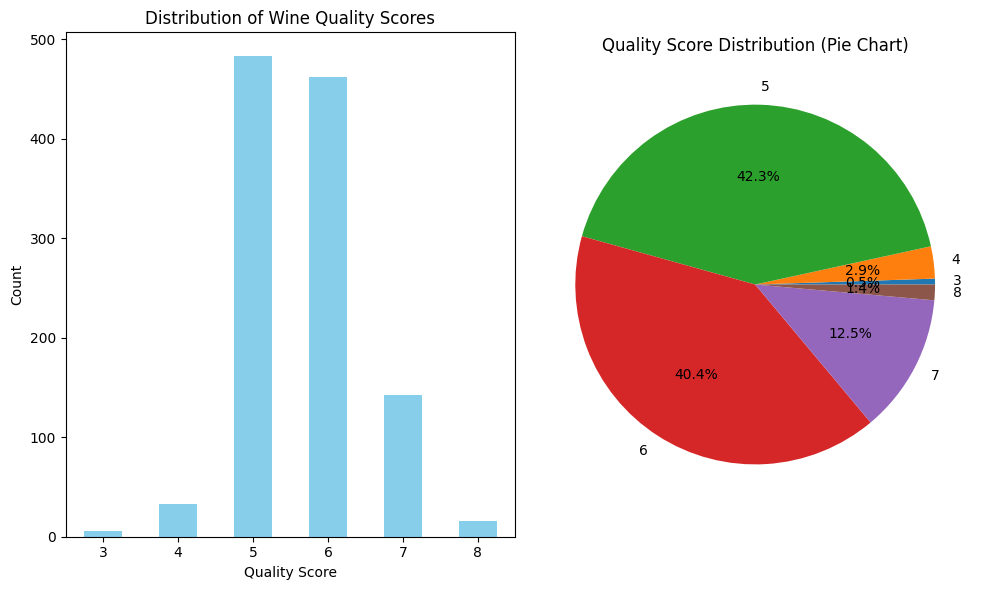

In [4]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Check quality distribution
print("\nQuality Distribution:")
quality_dist = df['quality'].value_counts().sort_index()
print(quality_dist)

# Visualize quality distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
quality_dist.plot(kind='bar', color='skyblue')
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.pie(quality_dist.values, labels=quality_dist.index, autopct='%1.1f%%')
plt.title('Quality Score Distribution (Pie Chart)')

plt.tight_layout()
plt.show()

## 4. Data Preprocessing

Before building our Decision Tree models, let's prepare the data:

In [5]:
# Remove the Id column as it's not useful for prediction
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)

# Separate features and target
X = df.drop('quality', axis=1)
y = df['quality']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature names:")
print(list(X.columns))

Features shape: (1143, 11)
Target shape: (1143,)

Feature names:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


Categorical Quality Distribution:
quality
Low       522
Medium    462
High      159
Name: count, dtype: int64


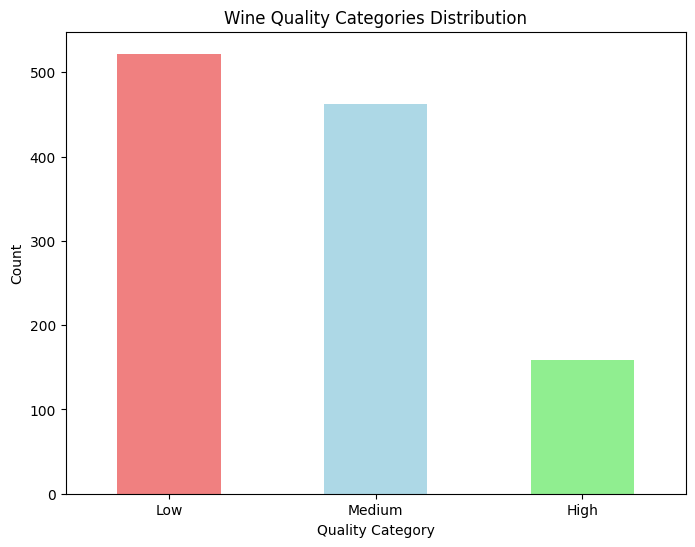

In [6]:
# Create quality categories for classification
# Low: 3-5, Medium: 6, High: 7-8
def categorize_quality(quality):
    if quality <= 5:
        return 'Low'
    elif quality == 6:
        return 'Medium'
    else:
        return 'High'

y_categorical = y.apply(categorize_quality)

print("Categorical Quality Distribution:")
print(y_categorical.value_counts())

# Visualize the categorical distribution
plt.figure(figsize=(8, 6))
y_categorical.value_counts().plot(kind='bar', color=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Wine Quality Categories Distribution')
plt.xlabel('Quality Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## 5. Feature Analysis and Correlation

Let's explore the relationships between features and wine quality:

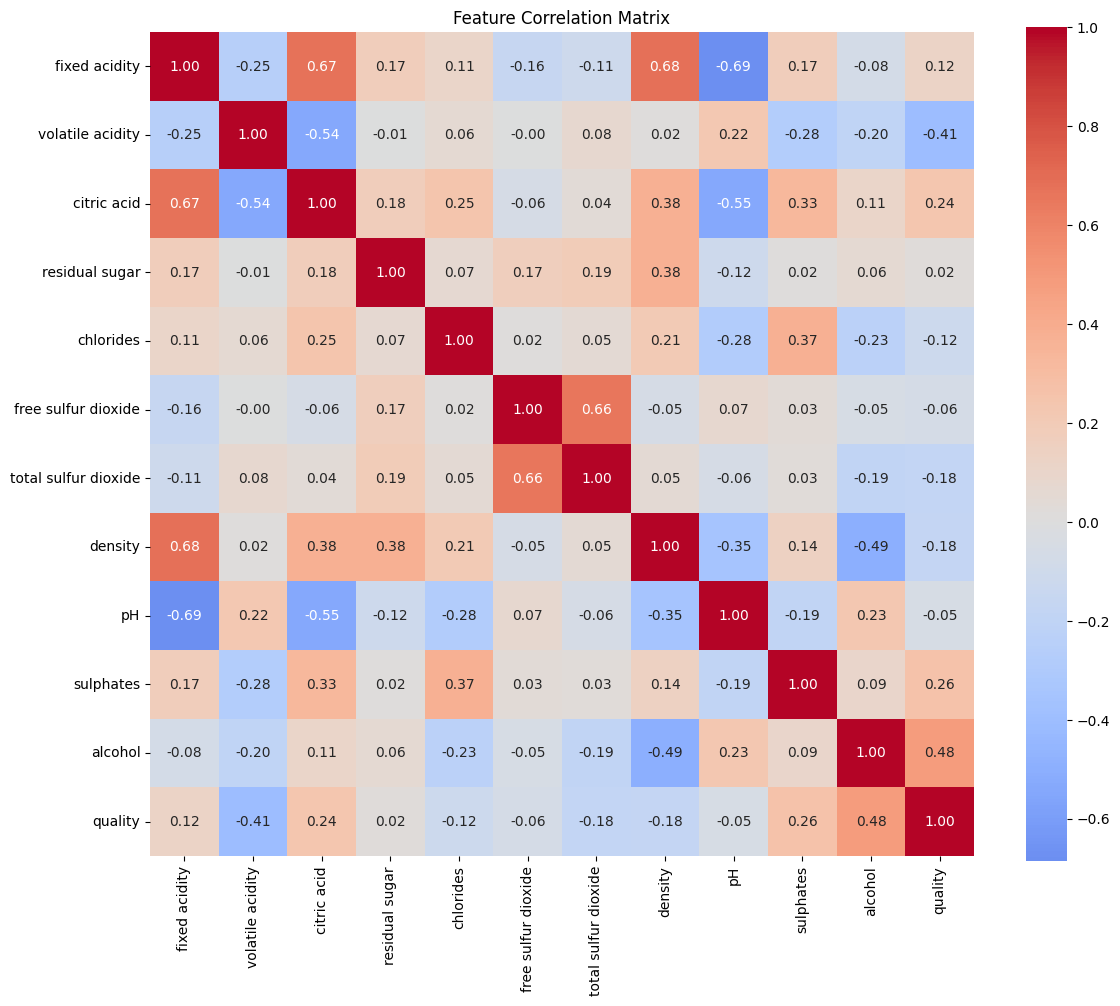

Features most correlated with quality:
alcohol                 0.484866
volatile acidity        0.407394
sulphates               0.257710
citric acid             0.240821
total sulfur dioxide    0.183339
density                 0.175208
chlorides               0.124085
fixed acidity           0.121970
free sulfur dioxide     0.063260
pH                      0.052453
residual sugar          0.022002
Name: quality, dtype: float64


In [7]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Features most correlated with quality
quality_corr = correlation_matrix['quality'].abs().sort_values(ascending=False)
print("Features most correlated with quality:")
print(quality_corr[1:])  # Exclude quality itself

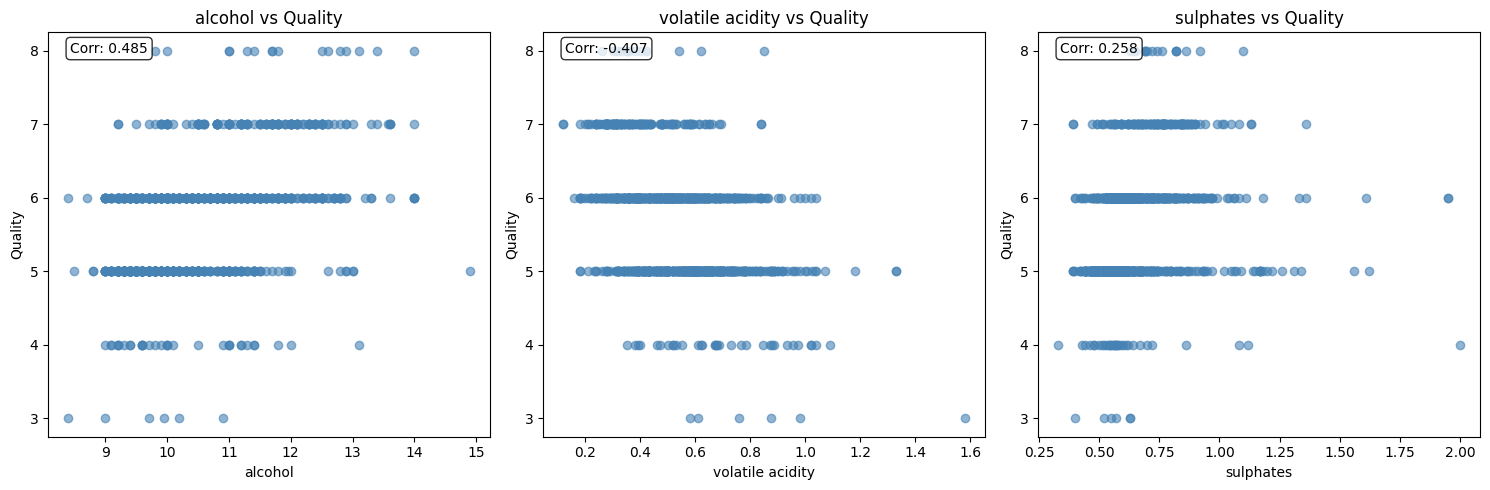

In [8]:
# Visualize relationships between top correlated features and quality
top_features = quality_corr[1:4].index  # Top 3 features

plt.figure(figsize=(15, 5))
for i, feature in enumerate(top_features, 1):
    plt.subplot(1, 3, i)
    plt.scatter(df[feature], df['quality'], alpha=0.6, color='steelblue')
    plt.xlabel(feature)
    plt.ylabel('Quality')
    plt.title(f'{feature} vs Quality')
    
    # Add correlation coefficient to the plot
    corr_coef = correlation_matrix.loc[feature, 'quality']
    plt.text(0.05, 0.95, f'Corr: {corr_coef:.3f}', 
             transform=plt.gca().transAxes, 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

---

## 6. Decision Tree for Regression

### Regression Task: Predicting Exact Quality Scores

In regression, we predict the continuous quality score (3, 4, 5, 6, 7, 8). The Decision Tree will create splits that minimize the Mean Squared Error at each node.

In [9]:
# Split data for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Regression Data Split:")
print(f"Training set: {X_train_reg.shape}")
print(f"Test set: {X_test_reg.shape}")
print(f"Training target distribution:\n{y_train_reg.value_counts().sort_index()}")

Regression Data Split:
Training set: (914, 11)
Test set: (229, 11)
Training target distribution:
quality
3      5
4     26
5    386
6    370
7    114
8     13
Name: count, dtype: int64


In [10]:
# Create and train Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(
    random_state=42,
    max_depth=5,  # Limit depth to prevent overfitting
    min_samples_split=20,
    min_samples_leaf=10
)

# Train the model
dt_regressor.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = dt_regressor.predict(X_test_reg)

print("Decision Tree Regressor trained successfully!")
print(f"Tree depth: {dt_regressor.get_depth()}")
print(f"Number of leaves: {dt_regressor.get_n_leaves()}")

Decision Tree Regressor trained successfully!
Tree depth: 5
Number of leaves: 27


In [11]:
# Evaluate Regression Model
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("=== Decision Tree Regression Results ===")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Cross-validation score
cv_scores = cross_val_score(dt_regressor, X_train_reg, y_train_reg, cv=5, scoring='r2')
print(f"\nCross-validation R² scores: {cv_scores}")
print(f"Average CV R² score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

=== Decision Tree Regression Results ===
Mean Squared Error (MSE): 0.4025
Root Mean Squared Error (RMSE): 0.6344
Mean Absolute Error (MAE): 0.4701
R² Score: 0.3762

Cross-validation R² scores: [0.33804554 0.14736284 0.22924541 0.29651598 0.34951666]
Average CV R² score: 0.2721 (+/- 0.1506)


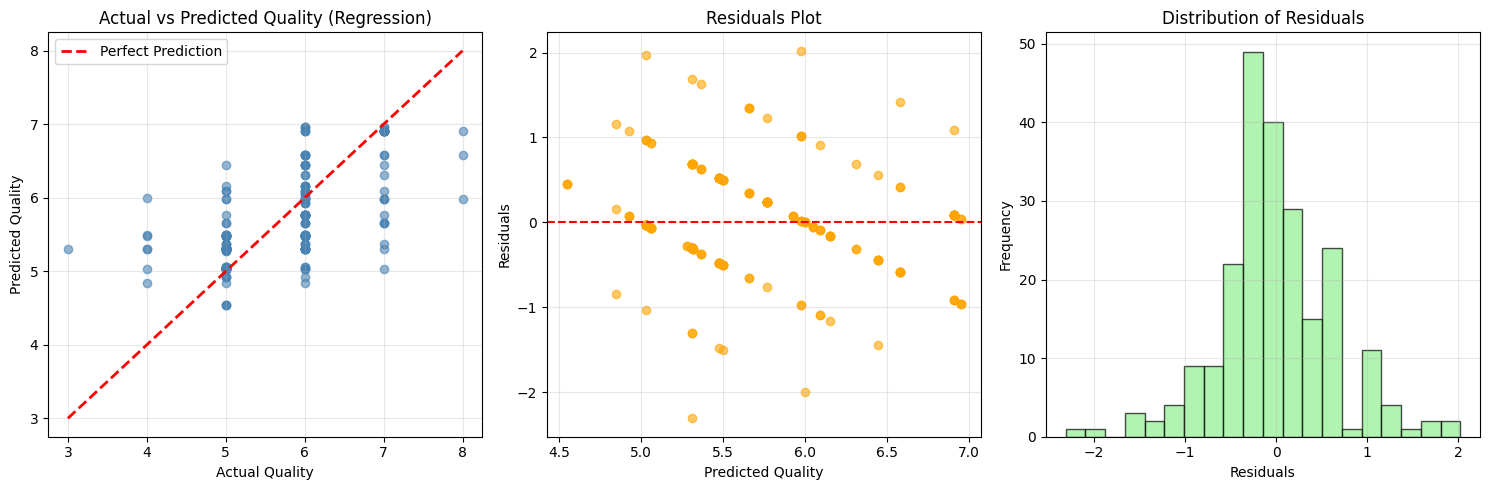

In [12]:
# Visualize Regression Results
plt.figure(figsize=(15, 5))

# Actual vs Predicted scatter plot
plt.subplot(1, 3, 1)
plt.scatter(y_test_reg, y_pred_reg, alpha=0.6, color='steelblue')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Quality (Regression)')
plt.legend()
plt.grid(True, alpha=0.3)

# Residuals plot
plt.subplot(1, 3, 2)
residuals = y_test_reg - y_pred_reg
plt.scatter(y_pred_reg, residuals, alpha=0.6, color='orange')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Quality')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True, alpha=0.3)

# Distribution of residuals
plt.subplot(1, 3, 3)
plt.hist(residuals, bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

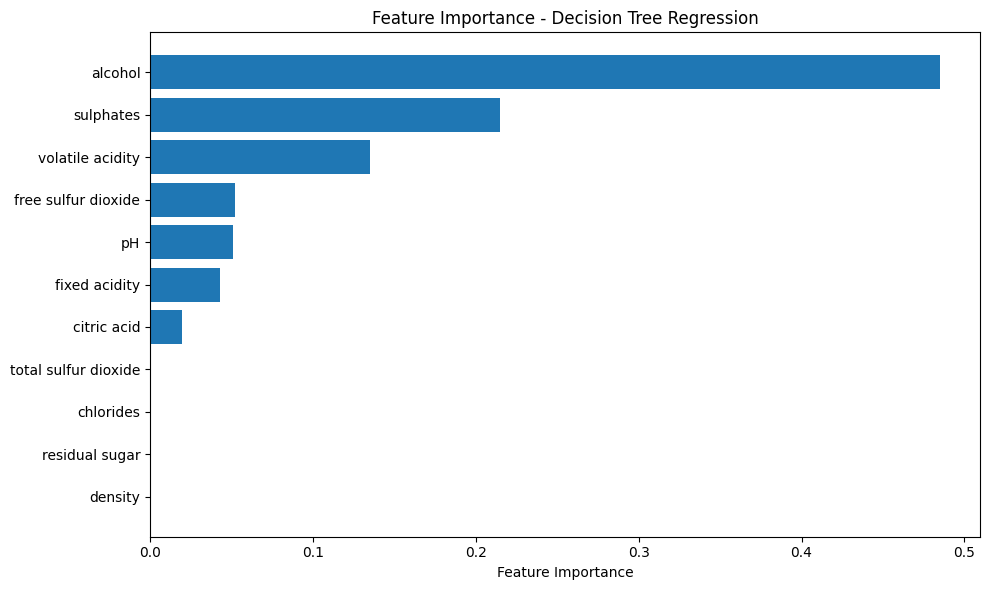

Top 5 Important Features for Regression:
                feature  importance
10              alcohol    0.485339
9             sulphates    0.214595
1      volatile acidity    0.135123
5   free sulfur dioxide    0.051932
8                    pH    0.050793


In [13]:
# Feature Importance for Regression
feature_importance_reg = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_regressor.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_reg['feature'][::-1], feature_importance_reg['importance'][::-1])
plt.xlabel('Feature Importance')
plt.title('Feature Importance - Decision Tree Regression')
plt.tight_layout()
plt.show()

print("Top 5 Important Features for Regression:")
print(feature_importance_reg.head())

---

## 7. Decision Tree for Classification

### Classification Task: Predicting Quality Categories

In classification, we predict the wine quality category (Low, Medium, High). The Decision Tree will create splits that minimize the Gini impurity or entropy at each node.

In [14]:
# Split data for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical
)

print("Classification Data Split:")
print(f"Training set: {X_train_clf.shape}")
print(f"Test set: {X_test_clf.shape}")
print(f"Training target distribution:\n{y_train_clf.value_counts()}")

Classification Data Split:
Training set: (914, 11)
Test set: (229, 11)
Training target distribution:
quality
Low       417
Medium    370
High      127
Name: count, dtype: int64


In [15]:
# Create and train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    criterion='gini'  # You can also try 'entropy'
)

# Train the model
dt_classifier.fit(X_train_clf, y_train_clf)

# Make predictions
y_pred_clf = dt_classifier.predict(X_test_clf)
y_pred_proba = dt_classifier.predict_proba(X_test_clf)

print("Decision Tree Classifier trained successfully!")
print(f"Tree depth: {dt_classifier.get_depth()}")
print(f"Number of leaves: {dt_classifier.get_n_leaves()}")
print(f"Classes: {dt_classifier.classes_}")

Decision Tree Classifier trained successfully!
Tree depth: 5
Number of leaves: 30
Classes: ['High' 'Low' 'Medium']


In [16]:
# Evaluate Classification Model
accuracy = accuracy_score(y_test_clf, y_pred_clf)

print("=== Decision Tree Classification Results ===")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_clf, y_pred_clf))

# Cross-validation score
cv_scores_clf = cross_val_score(dt_classifier, X_train_clf, y_train_clf, cv=5, scoring='accuracy')
print(f"\nCross-validation accuracy scores: {cv_scores_clf}")
print(f"Average CV accuracy: {cv_scores_clf.mean():.4f} (+/- {cv_scores_clf.std() * 2:.4f})")

=== Decision Tree Classification Results ===
Accuracy: 0.6114

Classification Report:
              precision    recall  f1-score   support

        High       0.43      0.47      0.45        32
         Low       0.76      0.70      0.73       105
      Medium       0.53      0.55      0.54        92

    accuracy                           0.61       229
   macro avg       0.57      0.58      0.57       229
weighted avg       0.62      0.61      0.61       229


Cross-validation accuracy scores: [0.55191257 0.6010929  0.66666667 0.65027322 0.68131868]
Average CV accuracy: 0.6303 (+/- 0.0952)


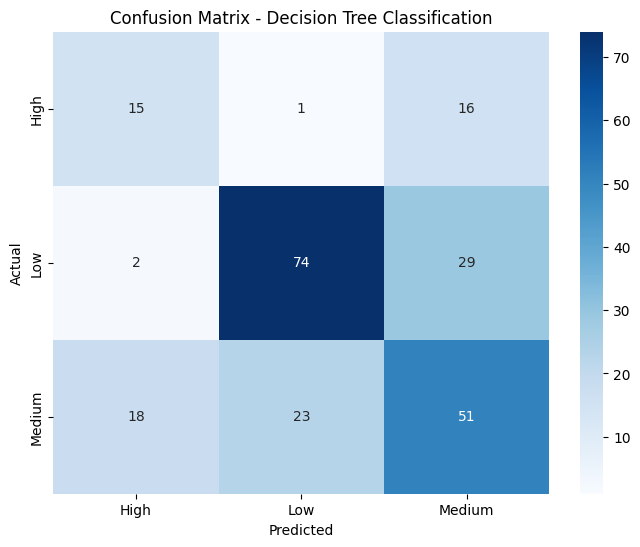

High class accuracy: 0.469
Low class accuracy: 0.705
Medium class accuracy: 0.554


In [17]:
# Confusion Matrix
cm = confusion_matrix(y_test_clf, y_pred_clf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=dt_classifier.classes_, 
            yticklabels=dt_classifier.classes_)
plt.title('Confusion Matrix - Decision Tree Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate per-class accuracy
class_accuracy = cm.diagonal() / cm.sum(axis=1)
for i, class_name in enumerate(dt_classifier.classes_):
    print(f"{class_name} class accuracy: {class_accuracy[i]:.3f}")

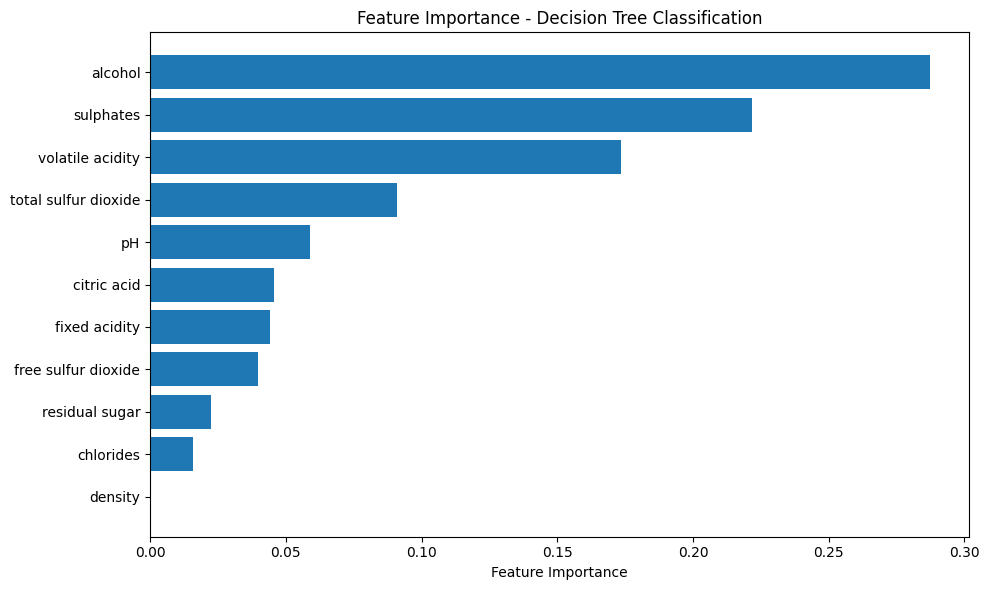

Top 5 Important Features for Classification:
                 feature  importance
10               alcohol    0.287164
9              sulphates    0.221568
1       volatile acidity    0.173558
6   total sulfur dioxide    0.091114
8                     pH    0.058852


In [18]:
# Feature Importance for Classification
feature_importance_clf = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_classifier.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_clf['feature'][::-1], feature_importance_clf['importance'][::-1])
plt.xlabel('Feature Importance')
plt.title('Feature Importance - Decision Tree Classification')
plt.tight_layout()
plt.show()

print("Top 5 Important Features for Classification:")
print(feature_importance_clf.head())

---

## 8. Visualizing the Decision Tree

Let's visualize our decision trees to understand how they make decisions:

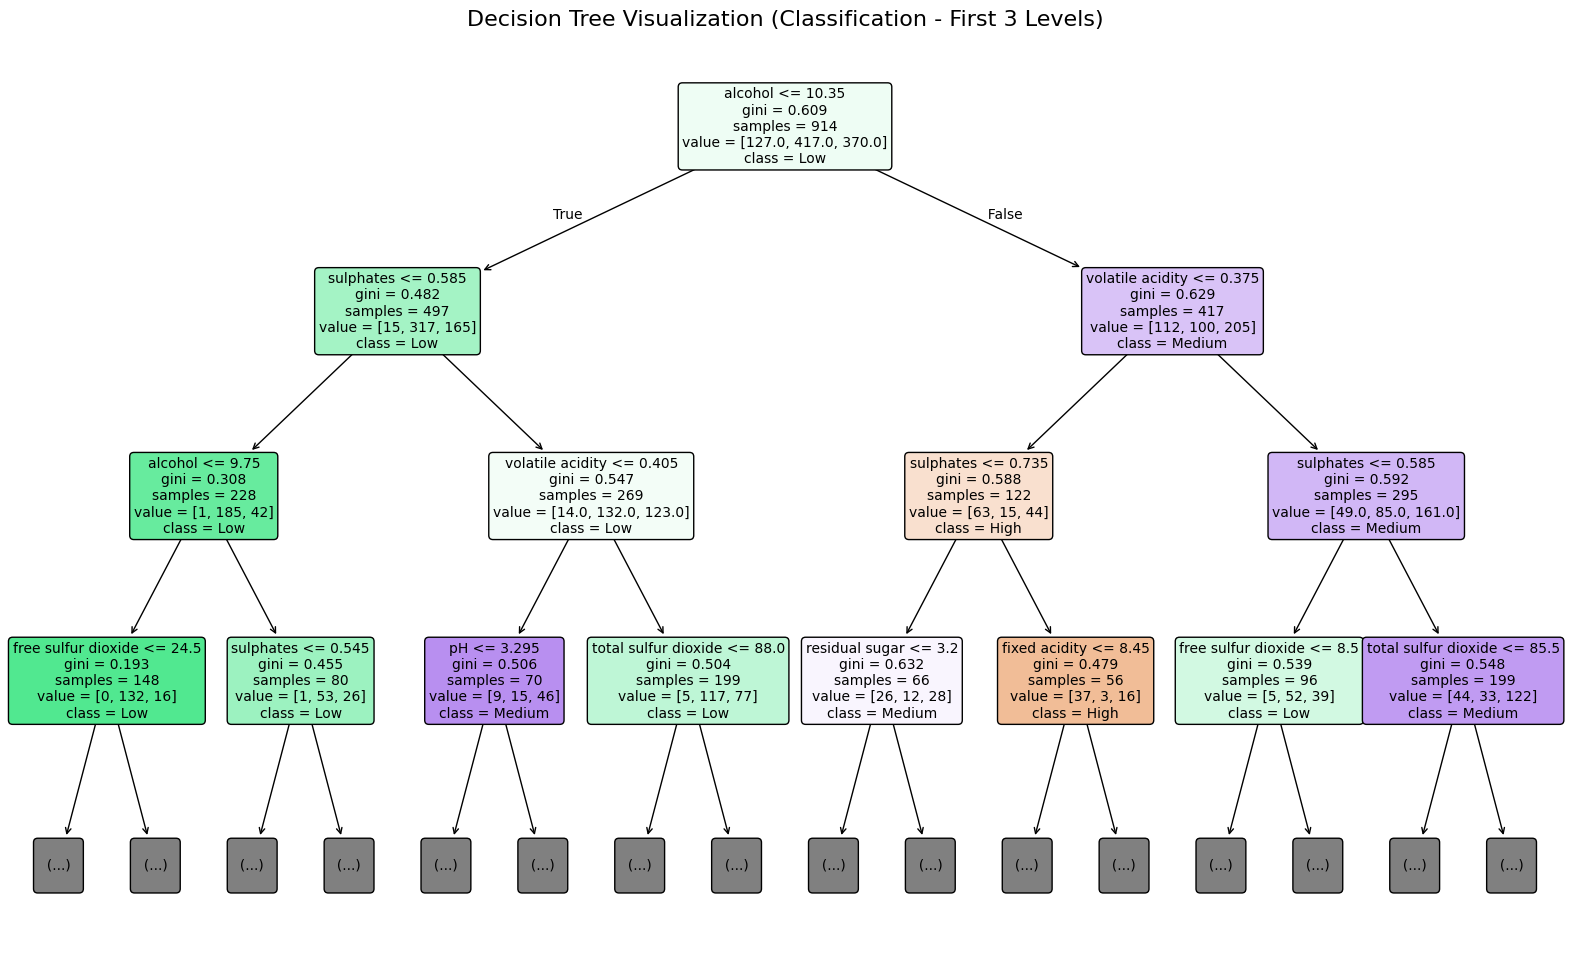

In [19]:
# Visualize Decision Tree (Classification) - Limited depth for readability
plt.figure(figsize=(20, 12))
plot_tree(dt_classifier, 
          max_depth=3,  # Limit depth for readability
          feature_names=X.columns,
          class_names=dt_classifier.classes_,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Visualization (Classification - First 3 Levels)', fontsize=16)
plt.show()

In [20]:
# Text representation of the decision tree
tree_rules = export_text(dt_classifier, 
                        feature_names=list(X.columns),
                        max_depth=4)
print("Decision Tree Rules (First 4 levels):")
print(tree_rules[:2000] + "...\n[truncated for readability]")

Decision Tree Rules (First 4 levels):
|--- alcohol <= 10.35
|   |--- sulphates <= 0.58
|   |   |--- alcohol <= 9.75
|   |   |   |--- free sulfur dioxide <= 24.50
|   |   |   |   |--- total sulfur dioxide <= 36.50
|   |   |   |   |   |--- class: Low
|   |   |   |   |--- total sulfur dioxide >  36.50
|   |   |   |   |   |--- class: Low
|   |   |   |--- free sulfur dioxide >  24.50
|   |   |   |   |--- class: Low
|   |   |--- alcohol >  9.75
|   |   |   |--- sulphates <= 0.55
|   |   |   |   |--- chlorides <= 0.07
|   |   |   |   |   |--- class: Medium
|   |   |   |   |--- chlorides >  0.07
|   |   |   |   |   |--- class: Low
|   |   |   |--- sulphates >  0.55
|   |   |   |   |--- pH <= 3.33
|   |   |   |   |   |--- class: Medium
|   |   |   |   |--- pH >  3.33
|   |   |   |   |   |--- class: Low
|   |--- sulphates >  0.58
|   |   |--- volatile acidity <= 0.41
|   |   |   |--- pH <= 3.29
|   |   |   |   |--- fixed acidity <= 10.65
|   |   |   |   |   |--- class: Low
|   |   |   |   |--- f

---

## 9. Hyperparameter Tuning

Let's optimize our Decision Tree models using Grid Search:

In [21]:
# Grid Search for Classification
param_grid_clf = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['gini', 'entropy']
}

grid_search_clf = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_clf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

print("Performing Grid Search for Classification...")
grid_search_clf.fit(X_train_clf, y_train_clf)

print("Best parameters for Classification:")
print(grid_search_clf.best_params_)
print(f"Best cross-validation score: {grid_search_clf.best_score_:.4f}")

Performing Grid Search for Classification...
Best parameters for Classification:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 10}
Best cross-validation score: 0.6368


In [22]:
# Grid Search for Regression
param_grid_reg = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['squared_error', 'absolute_error']
}

grid_search_reg = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid_reg,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

print("Performing Grid Search for Regression...")
grid_search_reg.fit(X_train_reg, y_train_reg)

print("Best parameters for Regression:")
print(grid_search_reg.best_params_)
print(f"Best cross-validation score: {grid_search_reg.best_score_:.4f}")

Performing Grid Search for Regression...
Best parameters for Regression:
{'criterion': 'squared_error', 'max_depth': 7, 'min_samples_leaf': 20, 'min_samples_split': 50}
Best cross-validation score: 0.2788


In [23]:
# Evaluate optimized models
best_clf = grid_search_clf.best_estimator_
best_reg = grid_search_reg.best_estimator_

# Classification evaluation
y_pred_best_clf = best_clf.predict(X_test_clf)
best_clf_accuracy = accuracy_score(y_test_clf, y_pred_best_clf)

# Regression evaluation
y_pred_best_reg = best_reg.predict(X_test_reg)
best_reg_r2 = r2_score(y_test_reg, y_pred_best_reg)
best_reg_rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_best_reg))

print("=== Optimized Model Performance ===")
print(f"Original Classification Accuracy: {accuracy:.4f}")
print(f"Optimized Classification Accuracy: {best_clf_accuracy:.4f}")
print(f"Improvement: {best_clf_accuracy - accuracy:.4f}")
print()
print(f"Original Regression R²: {r2:.4f}")
print(f"Optimized Regression R²: {best_reg_r2:.4f}")
print(f"Improvement: {best_reg_r2 - r2:.4f}")
print()
print(f"Original Regression RMSE: {rmse:.4f}")
print(f"Optimized Regression RMSE: {best_reg_rmse:.4f}")
print(f"Improvement: {rmse - best_reg_rmse:.4f}")

=== Optimized Model Performance ===
Original Classification Accuracy: 0.6114
Optimized Classification Accuracy: 0.6245
Improvement: 0.0131

Original Regression R²: 0.3762
Optimized Regression R²: 0.3040
Improvement: -0.0722

Original Regression RMSE: 0.6344
Optimized Regression RMSE: 0.6701
Improvement: -0.0357


---

## 10. Model Interpretation and Insights

Let's analyze what our Decision Trees learned about wine quality:

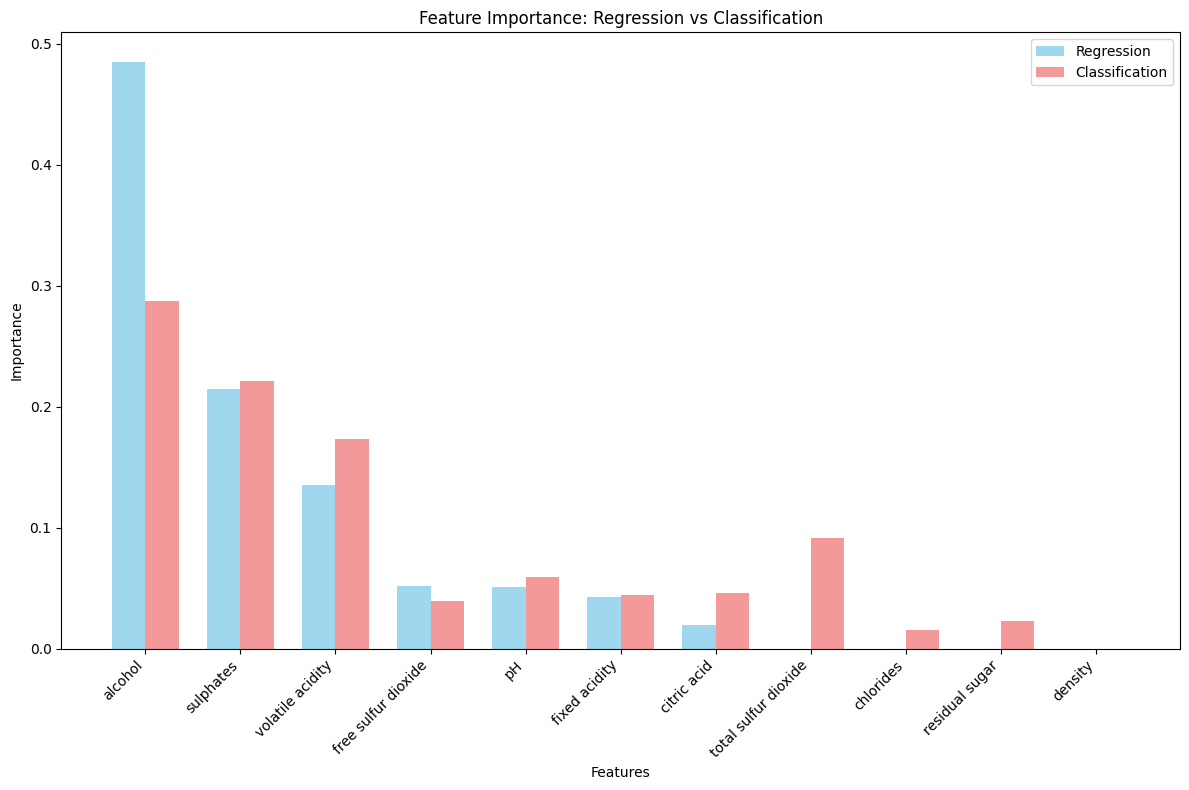

Feature Importance Comparison:
                 Feature  Regression_Importance  Classification_Importance
10               alcohol               0.485339                   0.287164
9              sulphates               0.214595                   0.221568
1       volatile acidity               0.135123                   0.173558
5    free sulfur dioxide               0.051932                   0.039643
8                     pH               0.050793                   0.058852
0          fixed acidity               0.042831                   0.044185
2            citric acid               0.019387                   0.045706
6   total sulfur dioxide               0.000000                   0.091114
4              chlorides               0.000000                   0.015734
3         residual sugar               0.000000                   0.022478
7                density               0.000000                   0.000000


In [24]:
# Compare feature importance between regression and classification
comparison_df = pd.DataFrame({
    'Feature': X.columns,
    'Regression_Importance': dt_regressor.feature_importances_,
    'Classification_Importance': dt_classifier.feature_importances_
})

comparison_df = comparison_df.sort_values('Regression_Importance', ascending=False)

plt.figure(figsize=(12, 8))
x = np.arange(len(comparison_df))
width = 0.35

plt.bar(x - width/2, comparison_df['Regression_Importance'], width, 
        label='Regression', alpha=0.8, color='skyblue')
plt.bar(x + width/2, comparison_df['Classification_Importance'], width, 
        label='Classification', alpha=0.8, color='lightcoral')

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance: Regression vs Classification')
plt.xticks(x, comparison_df['Feature'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

print("Feature Importance Comparison:")
print(comparison_df)

In [25]:
# Analyze prediction patterns
def analyze_predictions():
    # Create a sample prediction
    sample_wine = X_test_reg.iloc[0:1]
    
    print("=== Sample Wine Analysis ===")
    print("Wine features:")
    for feature, value in zip(X.columns, sample_wine.iloc[0]):
        print(f"{feature}: {value:.3f}")
    
    print(f"\nActual quality: {y_test_reg.iloc[0]}")
    print(f"Regression prediction: {dt_regressor.predict(sample_wine)[0]:.2f}")
    print(f"Classification prediction: {dt_classifier.predict(sample_wine.reindex(columns=X.columns))[0]}")
    
    # Prediction probabilities for classification
    probabilities = dt_classifier.predict_proba(sample_wine)
    print("\nClassification probabilities:")
    for class_name, prob in zip(dt_classifier.classes_, probabilities[0]):
        print(f"{class_name}: {prob:.3f}")

analyze_predictions()

=== Sample Wine Analysis ===
Wine features:
fixed acidity: 5.200
volatile acidity: 0.340
citric acid: 0.000
residual sugar: 1.800
chlorides: 0.050
free sulfur dioxide: 27.000
total sulfur dioxide: 63.000
density: 0.992
pH: 3.680
sulphates: 0.790
alcohol: 14.000

Actual quality: 6
Regression prediction: 6.44
Classification prediction: Medium

Classification probabilities:
High: 0.200
Low: 0.200
Medium: 0.600


---

## 11. Advantages and Limitations of Decision Trees

### Advantages:
1. **Interpretability**: Easy to understand and explain
2. **No assumptions**: Don't require assumptions about data distribution
3. **Handle mixed data**: Can work with both numerical and categorical features
4. **Feature selection**: Automatically performs feature selection
5. **Non-linear relationships**: Can capture complex non-linear patterns
6. **Missing values**: Can handle missing values naturally

### Limitations:
1. **Overfitting**: Prone to overfitting, especially with deep trees
2. **Instability**: Small changes in data can result in very different trees
3. **Bias**: Biased toward features with more levels
4. **Linear relationships**: May struggle with linear relationships
5. **Extrapolation**: Cannot extrapolate beyond the range of training data

### When to use Decision Trees:
- When interpretability is important
- With mixed data types
- For feature selection
- When you need to understand the decision-making process
- As a baseline model

---

## 12. Comparison: Regression vs Classification Approach

Let's compare the performance and use cases of both approaches:

In [26]:
# Convert regression predictions to categories for comparison
y_pred_reg_categorical = pd.Series(y_pred_reg).apply(lambda x: categorize_quality(round(x)))
y_test_reg_categorical = y_test_reg.apply(categorize_quality)

# Compare accuracy when both are treated as classification
reg_as_clf_accuracy = accuracy_score(y_test_reg_categorical, y_pred_reg_categorical)
direct_clf_accuracy = accuracy_score(y_test_clf, y_pred_clf)

print("=== Regression vs Classification Comparison ===")
print(f"Regression approach (converted to categories): {reg_as_clf_accuracy:.4f}")
print(f"Direct classification approach: {direct_clf_accuracy:.4f}")
print()

# When to use each approach
print("=== When to use each approach ===")
print("Use REGRESSION when:")
print("- You need precise quality scores (e.g., 5.7, 6.2)")
print("- You want to predict exact numerical values")
print("- The target variable is truly continuous")
print("- You need to understand the magnitude of differences")
print()
print("Use CLASSIFICATION when:")
print("- You need discrete categories (Low/Medium/High)")
print("- Decision boundaries are more important than exact values")
print("- You want probability estimates for each category")
print("- The business problem requires categorical decisions")

=== Regression vs Classification Comparison ===
Regression approach (converted to categories): 0.6900
Direct classification approach: 0.6114

=== When to use each approach ===
Use REGRESSION when:
- You need precise quality scores (e.g., 5.7, 6.2)
- You want to predict exact numerical values
- The target variable is truly continuous
- You need to understand the magnitude of differences

Use CLASSIFICATION when:
- You need discrete categories (Low/Medium/High)
- Decision boundaries are more important than exact values
- You want probability estimates for each category
- The business problem requires categorical decisions


---

## 13. Key Takeaways and Best Practices

### Key Learnings from this Session:

1. **Decision Trees are versatile**: Can handle both regression and classification tasks
2. **Feature importance**: Decision Trees provide natural feature selection and importance ranking
3. **Interpretability**: The tree structure makes the decision-making process transparent
4. **Hyperparameter tuning is crucial**: Proper tuning prevents overfitting and improves performance
5. **Different splitting criteria**: Gini, Entropy for classification; MSE, MAE for regression

### Best Practices:
1. **Always tune hyperparameters** (max_depth, min_samples_split, min_samples_leaf)
2. **Use cross-validation** to get reliable performance estimates
3. **Control tree complexity** to prevent overfitting
4. **Consider ensemble methods** (Random Forest, Gradient Boosting) for better performance
5. **Visualize the tree** to understand the decision-making process
6. **Compare different approaches** for the same problem

### Next Steps:
- Learn about Random Forests (ensemble of Decision Trees)
- Explore Gradient Boosting methods
- Study other tree-based algorithms (XGBoost, LightGBM)
- Practice with different datasets and problems

In [27]:
# Final summary of our models
print("=== SESSION 8 SUMMARY ===")
print("Dataset: Wine Quality (1143 samples, 11 features)")
print()
print("REGRESSION RESULTS:")
print(f"- R² Score: {r2:.4f}")
print(f"- RMSE: {rmse:.4f}")
print(f"- Most important feature: {feature_importance_reg.iloc[0]['feature']}")
print()
print("CLASSIFICATION RESULTS:")
print(f"- Accuracy: {accuracy:.4f}")
print(f"- Classes: {list(dt_classifier.classes_)}")
print(f"- Most important feature: {feature_importance_clf.iloc[0]['feature']}")
print()
print("Key insight: Both models identified similar important features for wine quality prediction!")

=== SESSION 8 SUMMARY ===
Dataset: Wine Quality (1143 samples, 11 features)

REGRESSION RESULTS:
- R² Score: 0.3762
- RMSE: 0.6344
- Most important feature: alcohol

CLASSIFICATION RESULTS:
- Accuracy: 0.6114
- Classes: ['High', 'Low', 'Medium']
- Most important feature: alcohol

Key insight: Both models identified similar important features for wine quality prediction!
